In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (10,10)

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

In [4]:
fe_model = tf.keras.models.load_model('./models/resnet_conv2_block3_out.h5')

In [5]:
fe_model.compute_output_shape((1, 512, 512, 3))

TensorShape([1, 128, 128, 256])

(3264, 1836, 3) 255
(815, 460, 3) 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


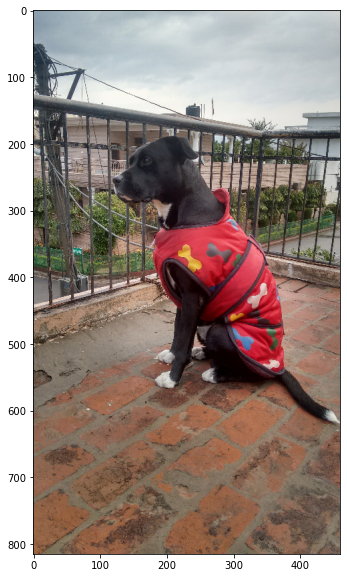

In [6]:
img = plt.imread('./data/shiro.jpg')
print(img.shape, img.max())
img = tf.image.resize(img, (815, 460), method=tf.image.ResizeMethod.LANCZOS3)
img = img/img.numpy().max()
print(img.shape, img.numpy().max())
plt.imshow(img)

In [7]:
def train_step(data, fe_model, filter_idx):
    with tf.GradientTape(watch_accessed_variables=False) as tape:
        tape.watch(data)
        act = fe_model(data)
        obj = 10*tf.reduce_sum(act[:, :, :, filter_idx]) + 0.001*tf.reduce_sum(tf.image.total_variation(data))

    grad = -tape.gradient(obj, data)
    return (grad, obj)

In [8]:
def train(data, fe_model, filter_idx, optimizer, iters):
    for i in range(iters):
        grad, obj = train_step(data, fe_model, filter_idx)
        optimizer.apply_gradients(zip([grad], [data]))
        if i % (iters//10) == 0:
            print("Iter = {}, Objective = {:.3}".format(i, obj))
    return data

In [9]:
data = tf.Variable(initial_value=tf.expand_dims(img, 0), trainable=True)
optimizer = tf.keras.optimizers.SGD()
data = train(data, fe_model, 2, optimizer, 500)

Iter = 0, Objective = 2.4e+05
Iter = 50, Objective = 2.86e+05
Iter = 100, Objective = 3.28e+05
Iter = 150, Objective = 3.61e+05
Iter = 200, Objective = 3.86e+05
Iter = 250, Objective = 4.05e+05
Iter = 300, Objective = 4.22e+05
Iter = 350, Objective = 4.35e+05
Iter = 400, Objective = 4.47e+05
Iter = 450, Objective = 4.58e+05


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


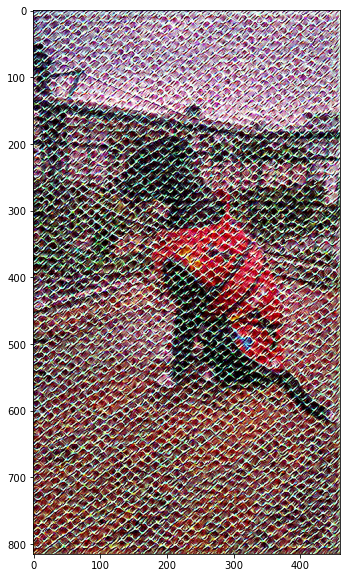

In [10]:
img_max_act = data[0].numpy()
plt.imshow(img_max_act)

In [11]:
fe_model = tf.keras.models.load_model('./models/resnet_conv3_block4_out.h5')

In [12]:
fe_model.compute_output_shape((1, 512, 512, 3))

TensorShape([1, 64, 64, 512])

In [13]:
data = tf.Variable(initial_value=tf.expand_dims(img, 0), trainable=True)
optimizer = tf.keras.optimizers.SGD()
data = train(data, fe_model, 2, optimizer, 500)

Iter = 0, Objective = 9.38e+02
Iter = 50, Objective = 1.37e+03
Iter = 100, Objective = 2.31e+03
Iter = 150, Objective = 3.75e+03
Iter = 200, Objective = 5.19e+03
Iter = 250, Objective = 6.45e+03
Iter = 300, Objective = 7.64e+03
Iter = 350, Objective = 9.01e+03
Iter = 400, Objective = 1.07e+04
Iter = 450, Objective = 1.3e+04


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


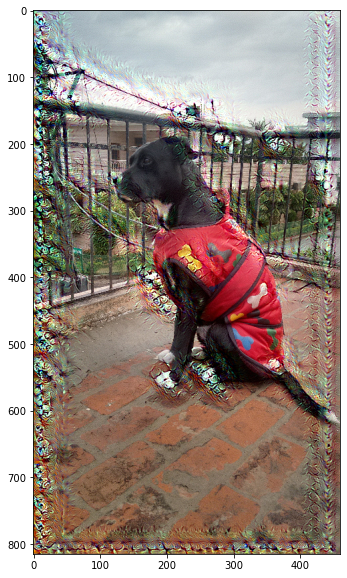

In [14]:
img_max_act = data[0].numpy()
plt.imshow(img_max_act)

In [21]:
data = tf.Variable(initial_value=tf.expand_dims(img, 0), trainable=True)
optimizer = tf.keras.optimizers.SGD()
data = train(data, fe_model, 4, optimizer, 500)

Iter = 0, Objective = 6.07e+03
Iter = 50, Objective = 1.07e+04
Iter = 100, Objective = 1.89e+04
Iter = 150, Objective = 2.81e+04
Iter = 200, Objective = 3.75e+04
Iter = 250, Objective = 4.71e+04
Iter = 300, Objective = 5.74e+04
Iter = 350, Objective = 6.86e+04
Iter = 400, Objective = 8.03e+04
Iter = 450, Objective = 9.26e+04


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


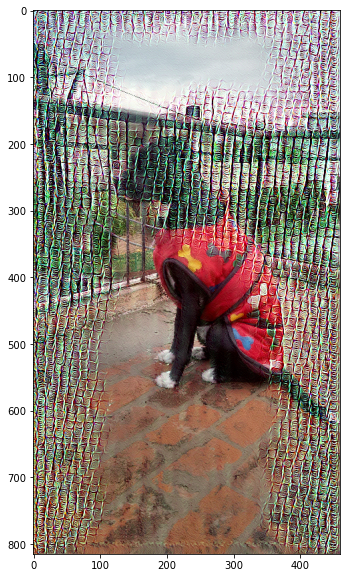

In [22]:
img_max_act = data[0].numpy()
plt.imshow(img_max_act)

In [25]:
data = tf.Variable(initial_value=tf.expand_dims(img, 0), trainable=True)
optimizer = tf.keras.optimizers.SGD()
data = train(data, fe_model, 7, optimizer, 500)

Iter = 0, Objective = 7.1e+04
Iter = 50, Objective = 1.39e+05
Iter = 100, Objective = 2.25e+05
Iter = 150, Objective = 2.66e+05
Iter = 200, Objective = 2.86e+05
Iter = 250, Objective = 2.99e+05
Iter = 300, Objective = 3.09e+05
Iter = 350, Objective = 3.17e+05
Iter = 400, Objective = 3.24e+05
Iter = 450, Objective = 3.31e+05


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


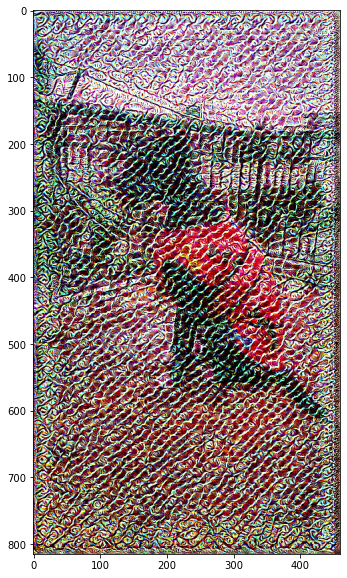

In [26]:
img_max_act = data[0].numpy()
plt.imshow(img_max_act)